In [2]:
import retinanalysis as ra
import cell_search as cs
import numpy as np
import importlib
importlib.reload(cs)

<module 'cell_search' from '/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/nbs/cell_search.py'>

In [3]:
# ra.reload_celltypefiles()

## Query for WN protocol


Found 93 experiments, 417 epoch blocks.



Finding typing files for unique experiments:   0%|          | 0/93 [00:00<?, ?it/s]

Error reading cell typing file /Volumes/data-1/analysis/20231026C/noise1K/kilosort2/classification.txt. Please check the file format.
Error reading cell typing file /Volumes/data-1/analysis/20231026C/noise1K/kilosort2/classification.txt. Please check the file format.
Error reading cell typing file /Volumes/data-1/analysis/20231026C/noise1K/kilosort2/classification.txt. Please check the file format.
Error reading cell typing file /Volumes/data-1/analysis/20231026C/noise1K/kilosort2/classification.txt. Please check the file format.
Error reading cell typing file /Volumes/data-1/analysis/20231026C/noise1K/kilosort2/classification.txt. Please check the file format.
Error reading cell typing file /Volumes/data-1/analysis/20231026C/noise1K/kilosort2/classification.txt. Please check the file format.
Error reading cell typing file /Volumes/data-1/analysis/20231026C/noise1K/kilosort2/classification.txt. Please check the file format.
Error reading cell typing file /Volumes/data-1/analysis/202310

,exp_name,datafile_name,chunk,nearest_noise_chunk,nearest_noise_distance
0,20220816C,data009,chunk1,chunk1,-30.783333
1,20220816C,data015,chunk2,chunk2,-30.766667
2,20220816C,data035,chunk3,chunk3,-30.766667
3,20220816C,data037,chunk4,chunk4,-30.750000
4,20220816C,data038,chunk4,chunk4,-30.750000
...,...,...,...,...,...
92,20250131C,data013,s_noise,s_noise,-24.800000
93,20250306H,data001,chunk1,chunk1,-61.850000
94,20250306H,data005,chunk2,chunk2,-61.766667
95,20250306H,data013,chunk3,chunk3,-61.750000


Found 800 datasets with typing files.
Found 140 unique datasets with typing files and > 0  cells of interest.
No data found for the given noise_ids and cell_types.
Error processing 20230614C, ['data000' 'data012'], chunk2, kilosort2, kilosort2.classification-FMR.txt: 'NoneType' object is not subscriptable
No data found for the given noise_ids and cell_types.
Error processing 20230713C, ['data016' 'data021' 'data024' 'data027'], chunk2, kilosort2, kilosort2.classification.txt: 'NoneType' object is not subscriptable
No data found for the given noise_ids and cell_types.
Error processing 20220712C, ['data014' 'data015' 'data020' 'data021' 'data022'], chunk2, kilosort2, kilosort2.classification.txt: 'NoneType' object is not subscriptable


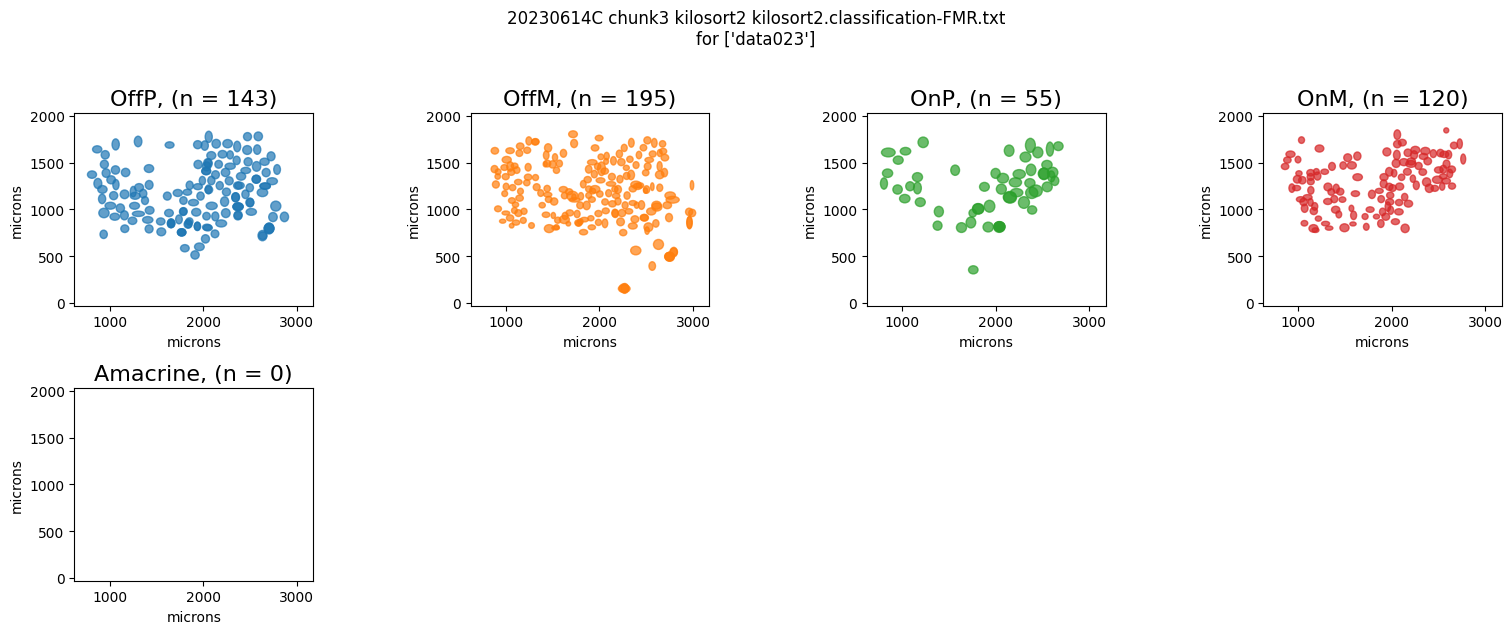

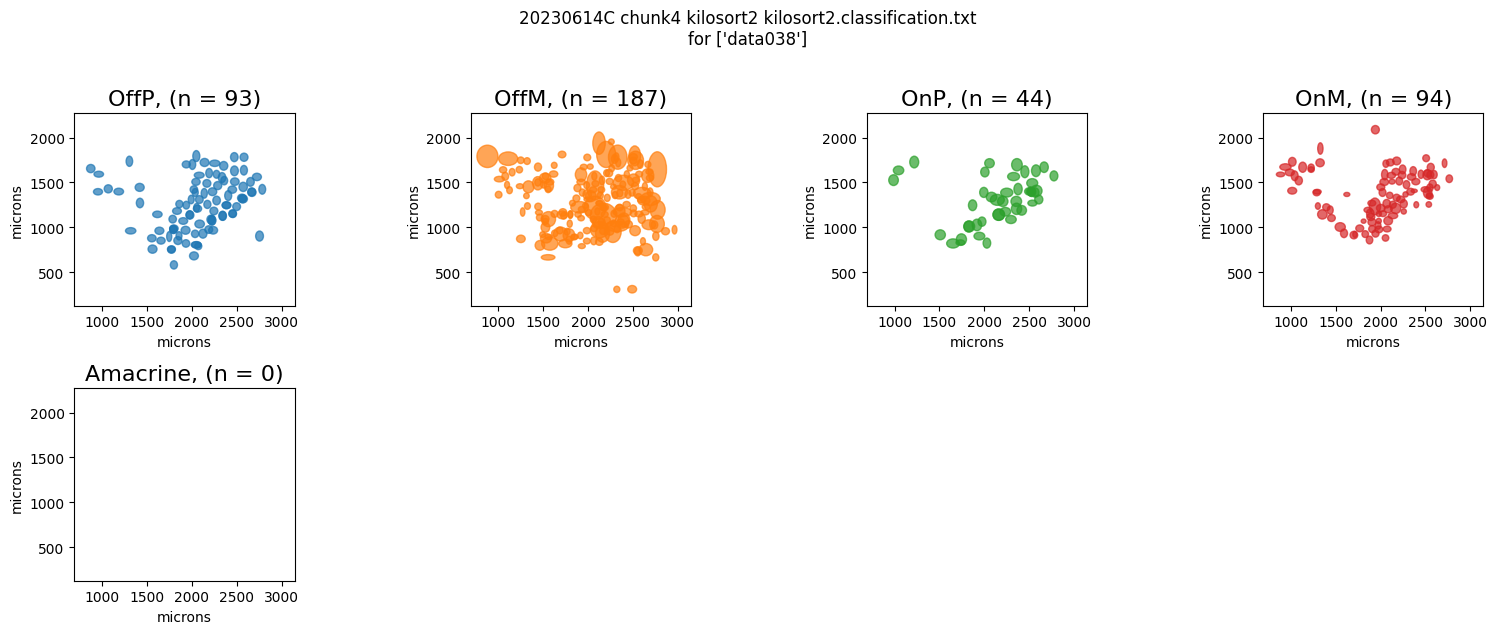

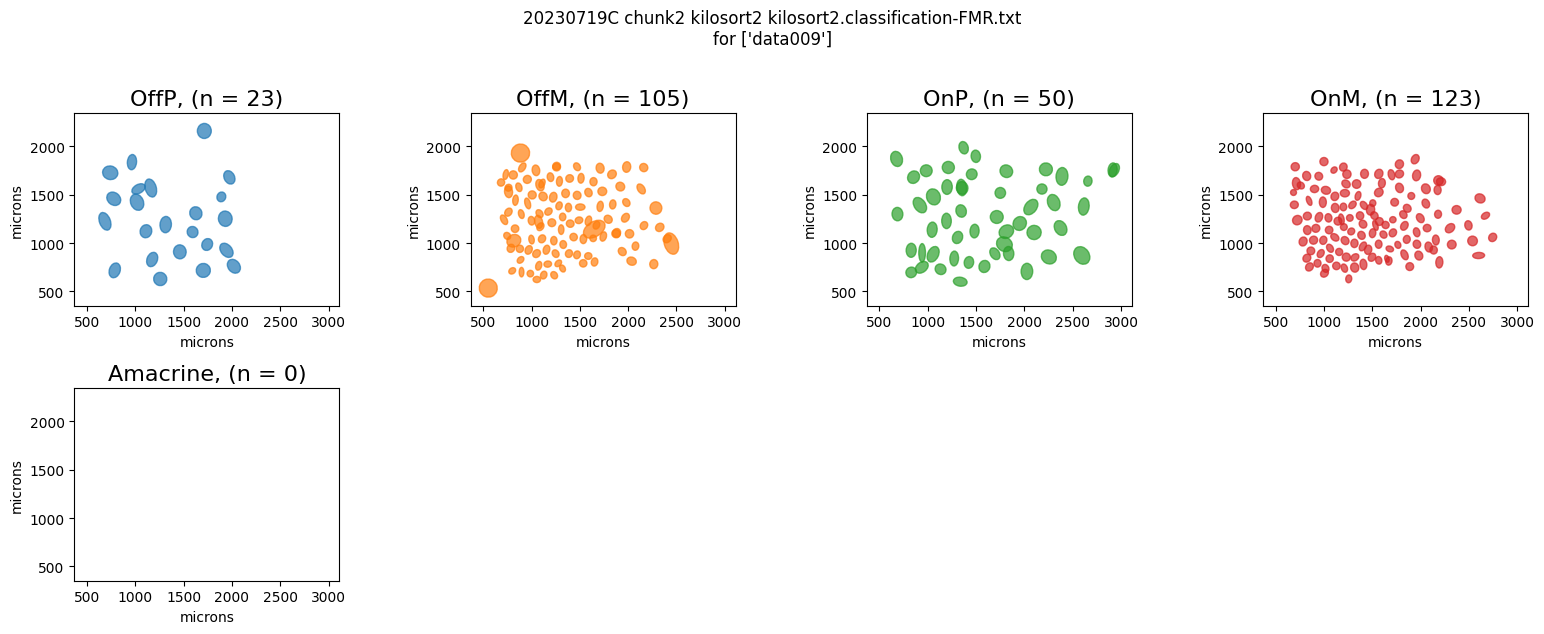

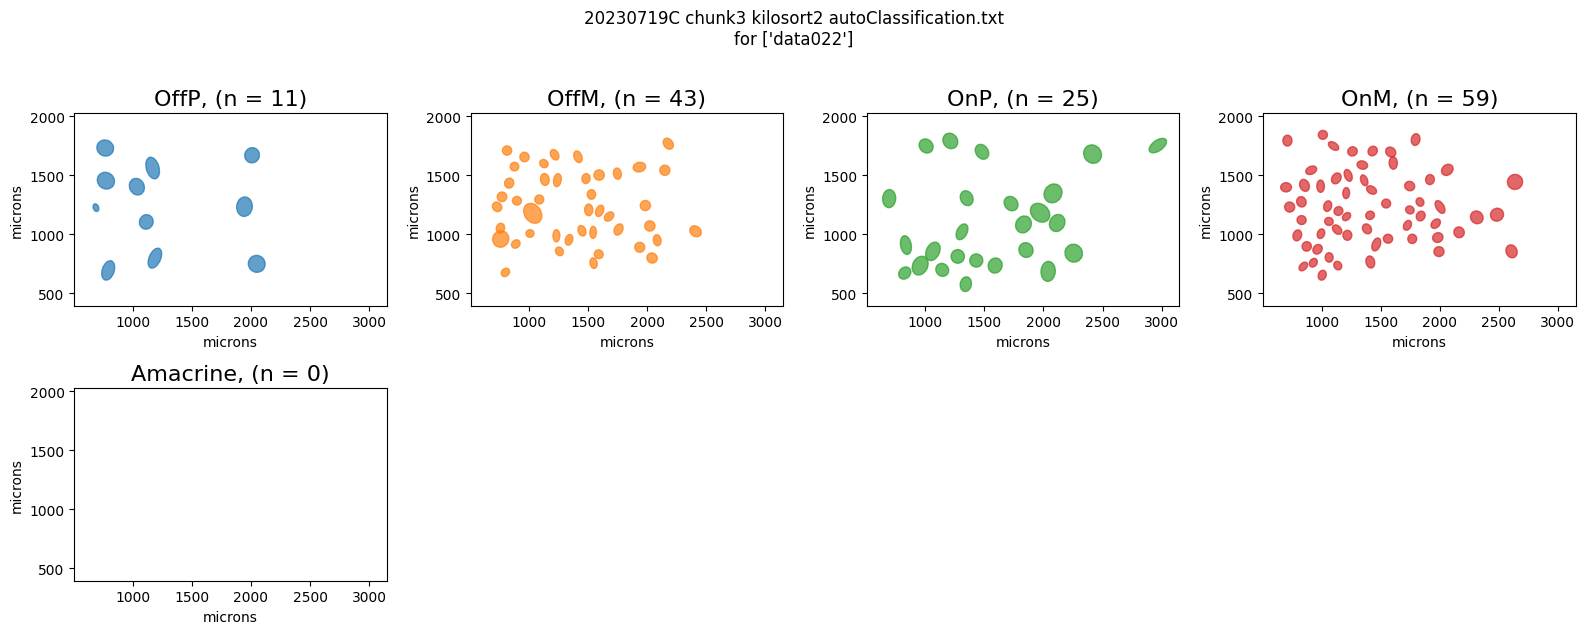

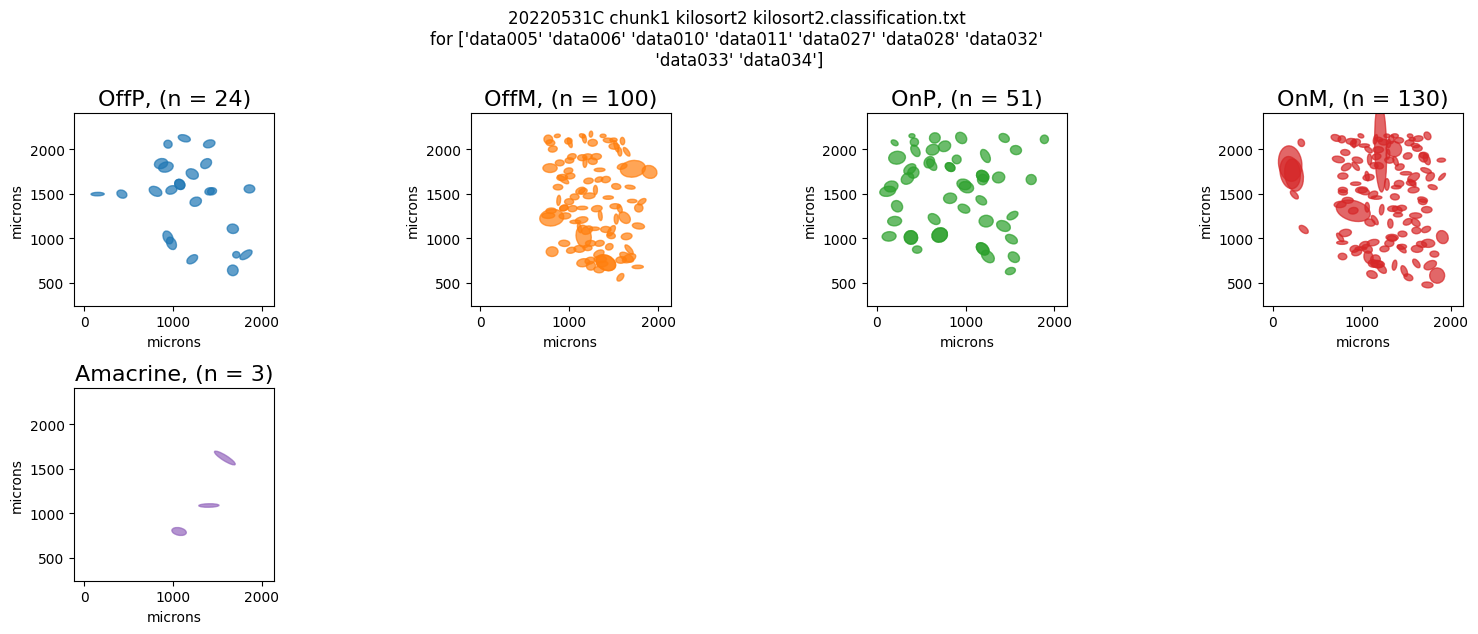

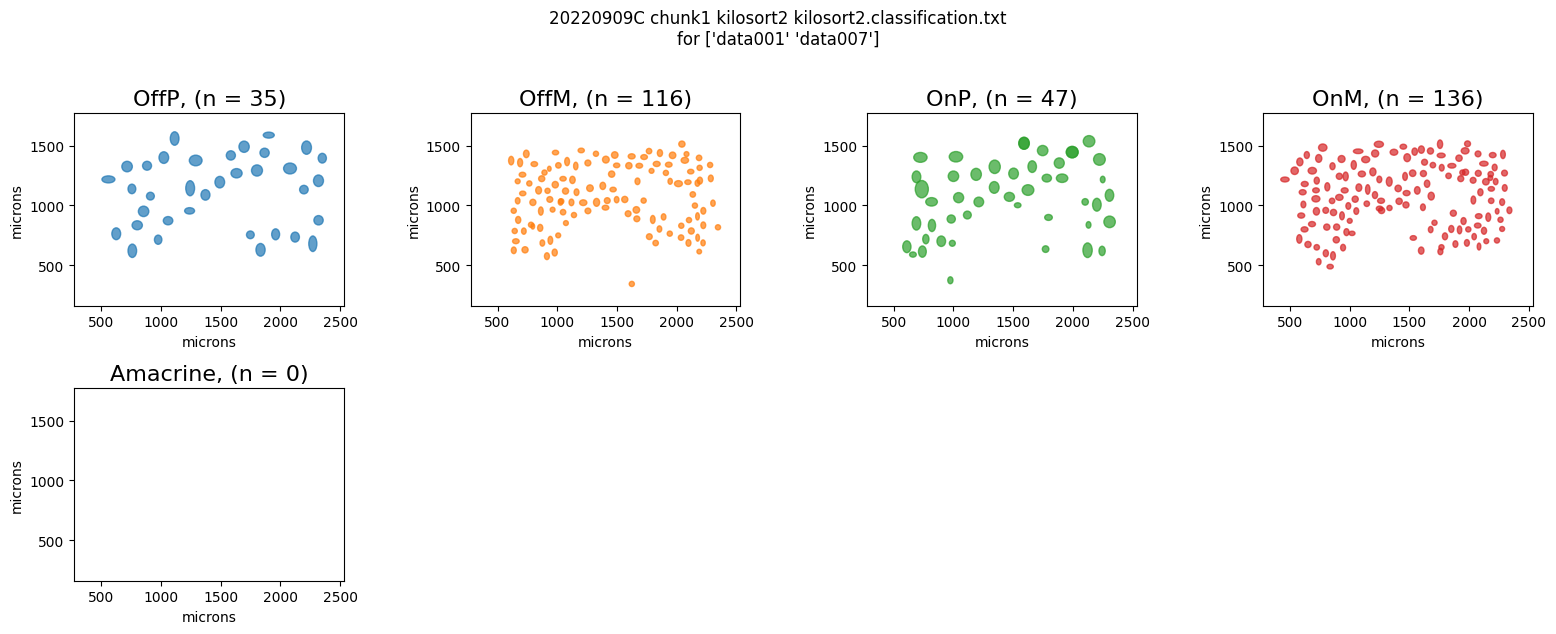

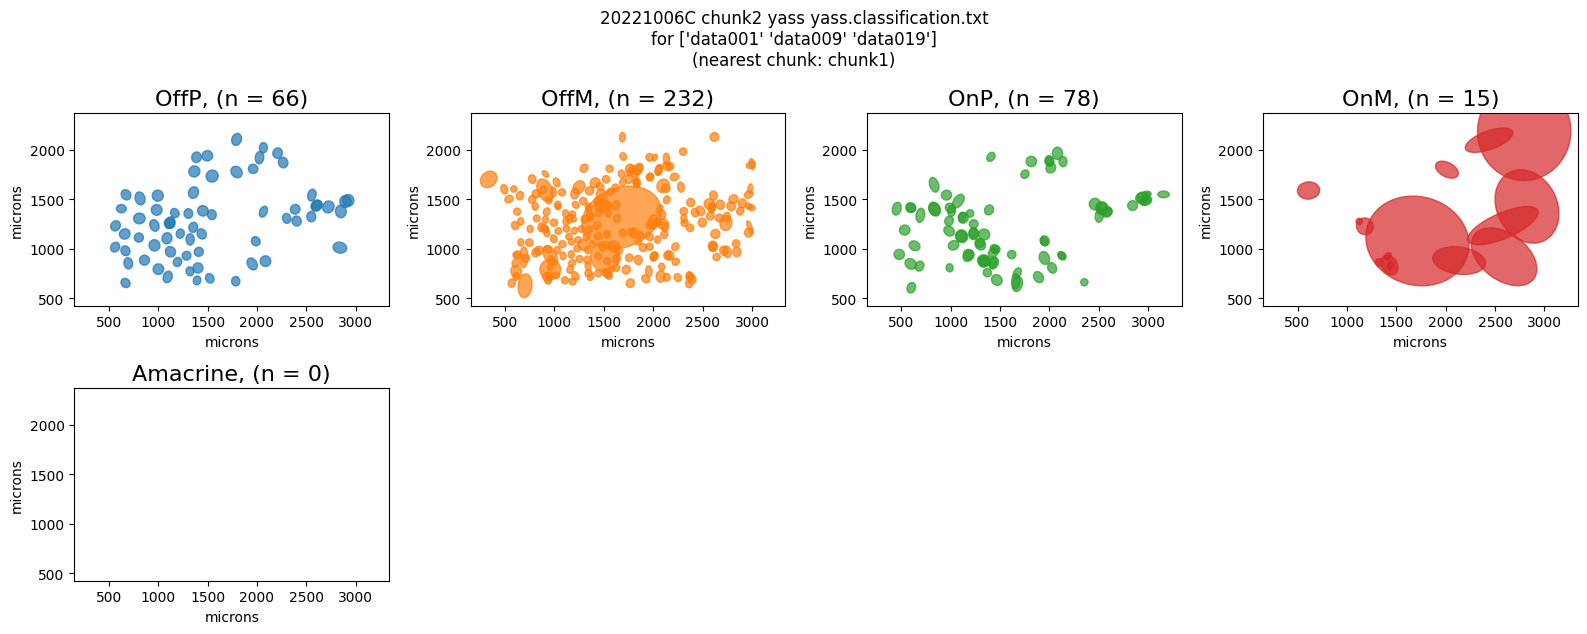

In [4]:
ls_noise_protocols = ['manookinlab.protocols.FastNoise', 'manookinlab.protocols.SpatialNoise']
df = ra.get_datasets_from_protocol_names(ls_noise_protocols, b_exact_match=True)
ls_cell_types = ['OffP', 'OffM', 'OnP', 'OnM', 'Amacrine']
df_typed, df_not_typed = ra.plot_mosaics_for_all_datasets(df, ls_cell_types, n_top=10)

## Search on each dataset in order of ncells

In [ ]:
import os
importlib.reload(cs)
str_parent_dir = '/Volumes/Vyom MEA/analysis/remla_search'
window_ms = 2000.0
df_q = df_typed.sort_values(by='n_cells_of_interest', ascending=False)
df_q = df_q[['exp_name', 'datafile_name', 'chunk', 'ss_version']].drop_duplicates()
df_q = df_q.reset_index()
for i, row in df_q.iterrows():
    exp_name = row['exp_name']
    datafile_name = row['datafile_name']
    chunk_name = row['chunk']
    ss_version = row['ss_version']
    str_save_dir = os.path.join(str_parent_dir, f'{exp_name}_{datafile_name}_{chunk_name}_{ss_version}')
    os.makedirs(str_save_dir, exist_ok=True)
    try:
        cs.cell_search(exp_name, chunk_name, datafile_name, ss_version, 
                       str_save_dir=str_save_dir, window_ms=window_ms)
    except Exception as e:
        print(f'Error processing {exp_name} {datafile_name} {chunk_name} {ss_version}:\n{e}')

Processing 20230613C data015 chunk2 kilosort2
Initializing ResponseBlock for 20230613C block 2018
For 20230613C block 2018:
Set pre_time_ms=250.0, stim_time_ms=180000.0, tail_time_ms=250.0
Delivered pre_frames=15, stim_frames=10800
Actual onset times (ms): [248.0]
Actual offset times (ms): [179309.0]
Loading frame monitor data from /Volumes/data-1/data/h5/20230613C.h5 ...
Loaded (1, 180500) frame_data.

Loading VCD from /Volumes/data-1/data/sorted/20230613C/data015/kilosort2 ...
VCD loaded with 890 cells.

Loading VCD from /Volumes/data-1/analysis/20230613C/chunk2/kilosort2 ...
